In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the processed data

In [39]:
data = pd.read_csv('ms_data.csv')
data['visit_date'] = pd.to_datetime(data['visit_date'])

# Convert categorical variables

In [40]:
data['education_level'] = data['education_level'].astype('category')
data['insurance_type'] = pd.Categorical(
    data['insurance_type'], 
    categories=['Basic', 'Premium', 'Platinum'], 
    ordered=True
)

# Walking speed analysis

## Scatter plot with regression line

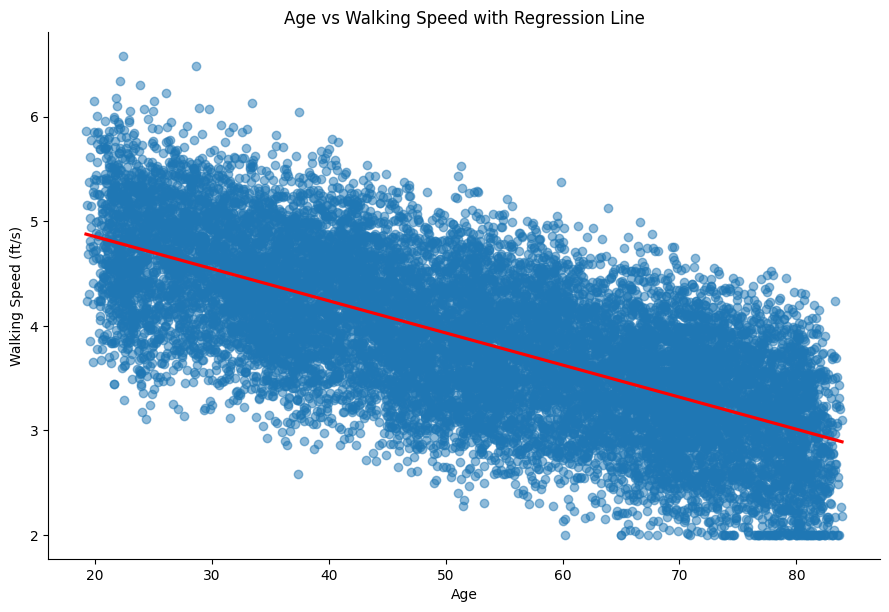

In [41]:
sns.lmplot(
    x='age', 
    y='walking_speed', 
    data=data, 
    aspect=1.5, 
    height=6,
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red'}
)
plt.title("Age vs Walking Speed with Regression Line")
plt.xlabel("Age")
plt.ylabel("Walking Speed (ft/s)")
plt.savefig("age_vs_walking_speed.png")
plt.show()

## Box plot by education level

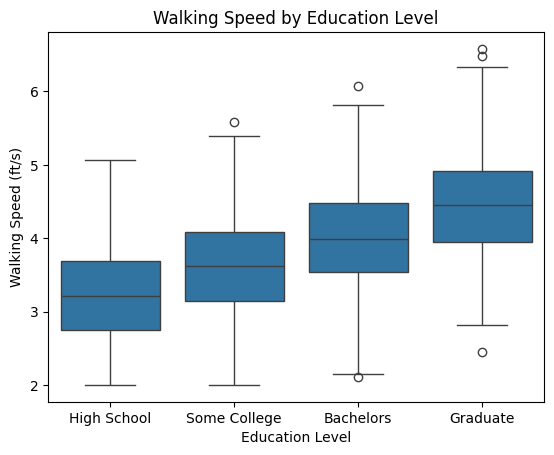

In [42]:
data['education_level'] = pd.Categorical(
    data['education_level'], 
    categories=['High School', 'Some College', 'Bachelors', 'Graduate'], 
    ordered=True
)
sns.boxplot(x='education_level', y='walking_speed', data=data)
plt.title("Walking Speed by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Walking Speed (ft/s)")
plt.savefig("walking_speed_by_education.png")
plt.show()

## Line plot showing interaction effect

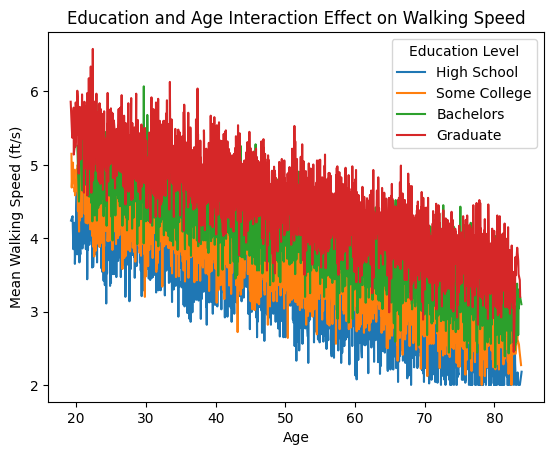

In [57]:
interaction_means = data.groupby(['age', 'education_level'], observed=True)['walking_speed'].mean().reset_index()
sns.lineplot(
    x='age', 
    y='walking_speed', 
    hue='education_level', 
    data=interaction_means
)
plt.title("Education and Age Interaction Effect on Walking Speed")
plt.xlabel("Age")
plt.ylabel("Mean Walking Speed (ft/s)")
plt.legend(title="Education Level")
plt.savefig("education_age_interaction.png")
plt.show()

# Cost analysis

## Bar plot with error bars

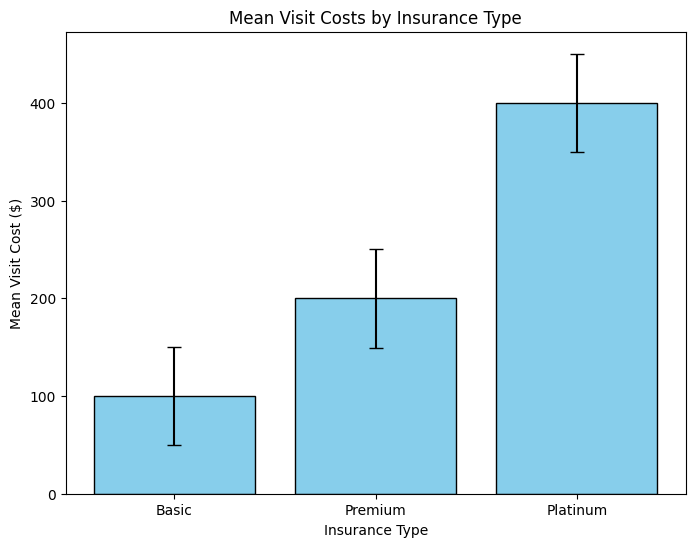

In [44]:

cost_stats = data.groupby('insurance_type', observed=True)['visit_cost'].agg(['mean', 'std']).reset_index()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(
    cost_stats['insurance_type'], 
    cost_stats['mean'], 
    yerr=cost_stats['std'], 
    capsize=5,  # Add caps to error bars
    color='skyblue', 
    edgecolor='black'
)
ax.set_title("Mean Visit Costs by Insurance Type")
ax.set_xlabel("Insurance Type")
ax.set_ylabel("Mean Visit Cost ($)")
plt.savefig("mean_costs_by_insurance.png")
plt.show()

## Box plot of visit costs by insurance type

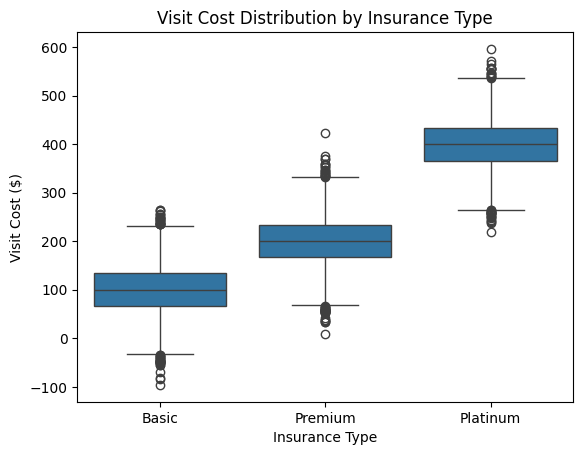

In [45]:
sns.boxplot(x='insurance_type', y='visit_cost', data=data)
plt.title("Visit Cost Distribution by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Visit Cost ($)")
plt.savefig("cost_distribution_by_insurance.png")
plt.show()

# Combined visualizations

## Pair plot for key variables

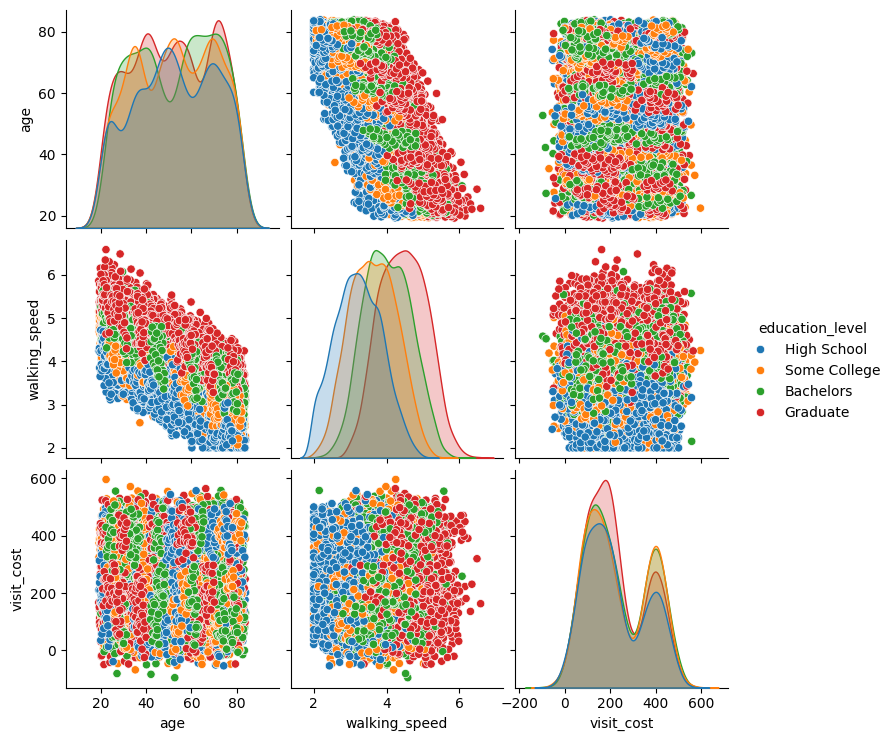

In [46]:
sns.pairplot(data[['age', 'walking_speed', 'visit_cost', 'education_level']], hue='education_level')
plt.savefig("pair_plot_key_variables.png")
plt.show()

## Facet grid: Walking speed by insurance type and education level

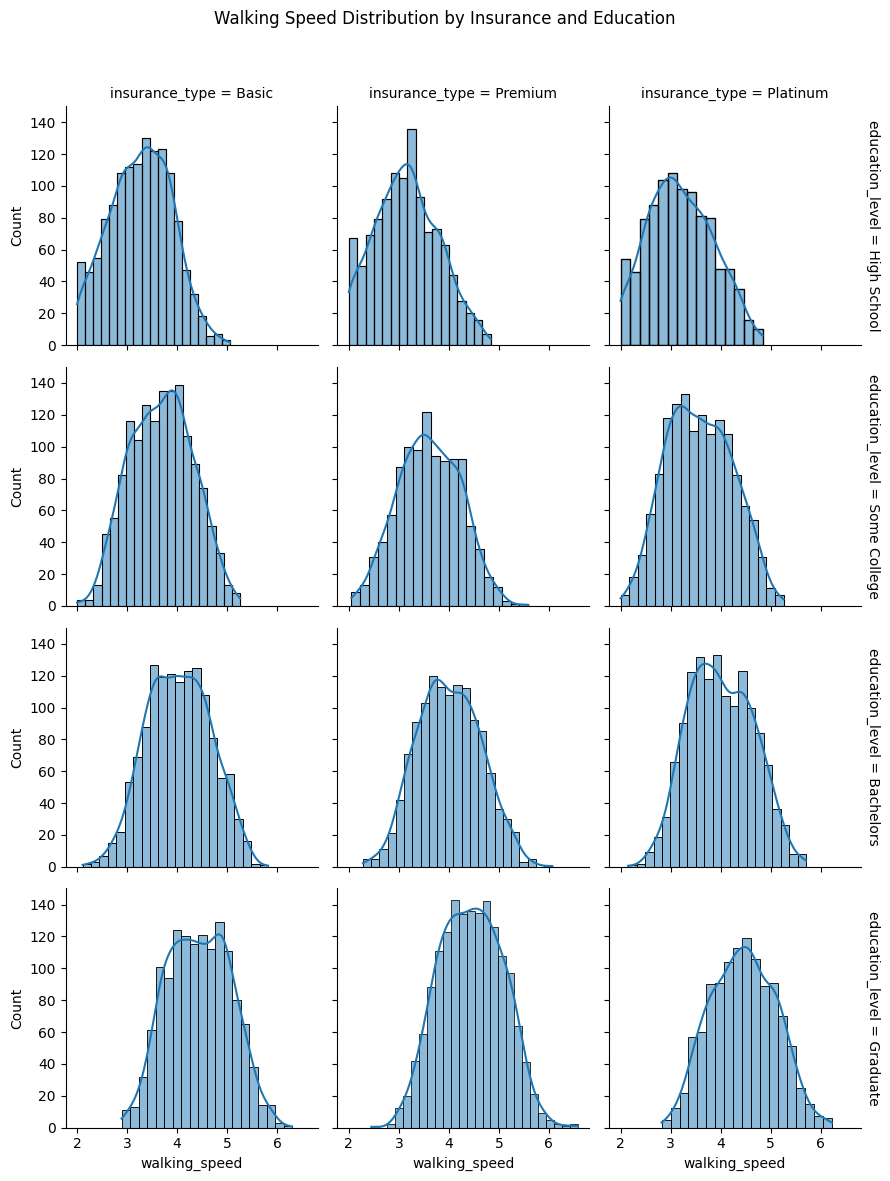

In [47]:
g = sns.FacetGrid(data, col="insurance_type", row="education_level", margin_titles=True)
g.map(sns.histplot, "walking_speed", kde=True)
g.fig.subplots_adjust(top=0.9)  # Adjust for title
g.fig.suptitle("Walking Speed Distribution by Insurance and Education")
plt.savefig("faceted_walking_speed.png")
plt.show()

## Line plot for walking speed trends over time

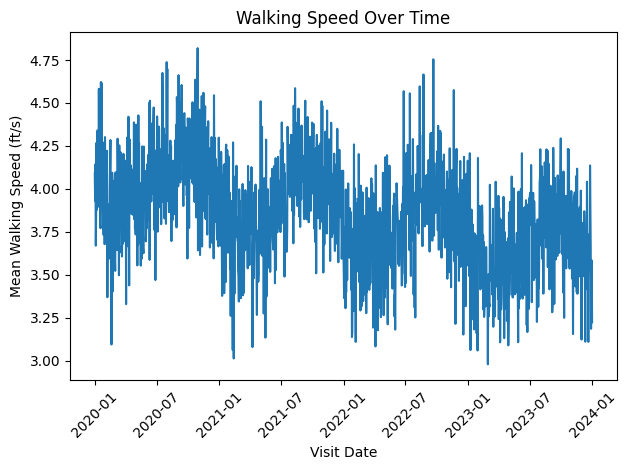

In [48]:
time_trends = data.groupby('visit_date')['walking_speed'].mean().reset_index()
sns.lineplot(x='visit_date', y='walking_speed', data=time_trends)
plt.title("Walking Speed Over Time")
plt.xlabel("Visit Date")
plt.ylabel("Mean Walking Speed (ft/s)")
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.savefig("walking_speed_time_trends.png")
plt.show()

# Bonus tasks

## Polynomial regression for walking speed by age

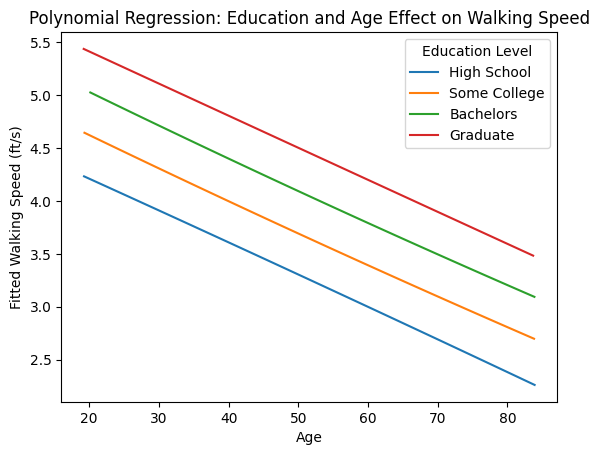

In [59]:

fitted_lines_poly = pd.DataFrame()
poly = PolynomialFeatures(degree=2, include_bias=False)
for level in data['education_level'].cat.categories:
    subset = data[data['education_level'] == level]
    
    X_train = subset[['age']]
    y_train = subset['walking_speed']
    
    X_poly = poly.fit_transform(X_train)
    model = LinearRegression().fit(X_poly, y_train)
    
    age_range = np.linspace(subset['age'].min(), subset['age'].max(), 100)
    age_range_df = pd.DataFrame(age_range, columns=['age'])  # Create a DataFrame with column names
    age_range_poly = poly.transform(age_range_df)  # Transform using the same feature names
    fitted_values = model.predict(age_range_poly)
    
    fitted_df = pd.DataFrame({
        'age': age_range,
        'walking_speed': fitted_values,
        'education_level': level
    })
    fitted_lines_poly = pd.concat([fitted_lines_poly, fitted_df])

sns.lineplot(
    x='age', 
    y='walking_speed', 
    hue='education_level', 
    data=fitted_lines_poly
)
plt.title("Polynomial Regression: Education and Age Effect on Walking Speed")
plt.xlabel("Age")
plt.ylabel("Fitted Walking Speed (ft/s)")
plt.legend(title="Education Level")
plt.savefig("education_age_polynomial_regression.png")
plt.show()

## Using plotly for interactive plots

In [61]:
fig = px.scatter(
    data,
    x='age',
    y='walking_speed',
    color='education_level',
    trendline='ols',
    title='Interactive Plot: Education and Age Effect on Walking Speed'
)
fig.update_layout(xaxis_title='Age', yaxis_title='Walking Speed (ft/s)')
fig.write_html("interactive_walking_speed.html")
fig.show()

## Seasonal analysis of walking speed

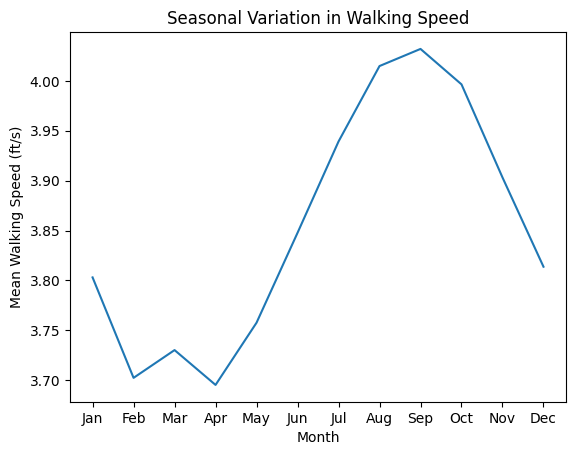

In [62]:
data['month'] = data['visit_date'].dt.month
seasonal_means = data.groupby('month')['walking_speed'].mean().reset_index()
sns.lineplot(x='month', y='walking_speed', data=seasonal_means)
plt.title("Seasonal Variation in Walking Speed")
plt.xlabel("Month")
plt.ylabel("Mean Walking Speed (ft/s)")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig("seasonal_variation_walking_speed.png")
plt.show()